<a href="https://colab.research.google.com/github/joseluan/ml_magalu/blob/main/Magalu_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import gdown

In [19]:

nome_arquivo = 'magalu.csv'
# Baixando o csv das ofertas
gdown.download(url='https://drive.google.com/file/d/1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2/view?usp=sharing', output=nome_arquivo, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2
To: /content/magalu.csv
100%|██████████| 94.1k/94.1k [00:00<00:00, 39.2MB/s]


'magalu.csv'

In [29]:
dataframe = pd.read_csv(nome_arquivo) # Carregando o csv das ofertas
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nome                  656 non-null    object 
 1   price                 656 non-null    float64
 2   old_price             656 non-null    float64
 3   average_year          656 non-null    float64
 4   var_year              656 non-null    int64  
 5   std_year              656 non-null    int64  
 6   average_six_months    656 non-null    float64
 7   var_six_months        656 non-null    float64
 8   std_six_months        656 non-null    float64
 9   average_three_months  656 non-null    float64
 10  var_three_months      656 non-null    float64
 11  std_three_months      656 non-null    float64
 12  status                656 non-null    object 
dtypes: float64(9), int64(2), object(2)
memory usage: 66.8+ KB


##Pre-processamento

In [30]:
#dataframe = dataframe.drop_duplicates() #Removendo duplicadas
print('Tamanho do dataframe', len(dataframe.loc[:,'status']))
dataframe = dataframe[dataframe['status'] != 'FINISHED'] # Retirando ofertas antigas
dataframe['status'] = dataframe['status'].replace('APPROVED', 1) # Mudando o valor de string para int
#dataframe['status'] = dataframe['status'].replace('FINISHED', 0) # Mudando o valor de string para int
dataframe['status'] = dataframe['status'].replace('REPPROVED', 0) # Mudando o valor de string para int

print('Tamanho do dataframe', len(dataframe.loc[:,'status']))
#Retirando linhas quando os valores de historico de ano, 6 meses e 3 meses do zoom forem igual a zero
dataframe = dataframe[dataframe['average_year'] > 0]
dataframe = dataframe[dataframe['var_year'] > 0]
dataframe = dataframe[dataframe['std_year'] > 0]

print('Tamanho do dataframe', len(dataframe.loc[:,'status']))
dataframe = dataframe[dataframe['average_six_months'] > 0]
dataframe = dataframe[dataframe['var_six_months'] > 0]
dataframe = dataframe[dataframe['std_six_months'] > 0]

print('Tamanho do dataframe', len(dataframe.loc[:,'status']))
dataframe = dataframe[dataframe['average_three_months'] > 0]
dataframe = dataframe[dataframe['var_three_months'] > 0]
dataframe = dataframe[dataframe['std_three_months'] > 0]

print('Tamanho do dataframe', len(dataframe.loc[:,'status']))
#del dataframe['var_year']
#del dataframe['std_year']

#del dataframe['var_six_months']
#del dataframe['std_six_months']

#del dataframe['var_three_months']
#del dataframe['std_three_months']


Tamanho do dataframe 656
Tamanho do dataframe 461
Tamanho do dataframe 441
Tamanho do dataframe 428
Tamanho do dataframe 423


<ipython-input-30-843e30a2a290>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['status'] = dataframe['status'].replace('APPROVED', 1) # Mudando o valor de string para int
<ipython-input-30-843e30a2a290>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['status'] = dataframe['status'].replace('REPPROVED', 0) # Mudando o valor de string para int


In [34]:
# Separando os dados entre treinamento e treino
X = dataframe.iloc[:,1:]
# a última coluna se refere a classe
y = dataframe.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.info()

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 144 to 177
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 338 non-null    float64
 1   old_price             338 non-null    float64
 2   average_year          338 non-null    float64
 3   var_year              338 non-null    int64  
 4   std_year              338 non-null    int64  
 5   average_six_months    338 non-null    float64
 6   var_six_months        338 non-null    float64
 7   std_six_months        338 non-null    float64
 8   average_three_months  338 non-null    float64
 9   var_three_months      338 non-null    float64
 10  std_three_months      338 non-null    float64
 11  status                338 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 34.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 1 to 655
Data columns (total 13 columns):
 #   Column            

##Treinamento

In [35]:
mlp = MLPClassifier(activation='identity',solver='lbfgs',hidden_layer_sizes=(30), random_state=1, learning_rate_init=0.001)

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
mlp.score(X_test, y_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.75      1.00      0.86        64

    accuracy                           0.75        85
   macro avg       0.38      0.50      0.43        85
weighted avg       0.57      0.75      0.65        85



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

##Comparando as funções de ativação

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


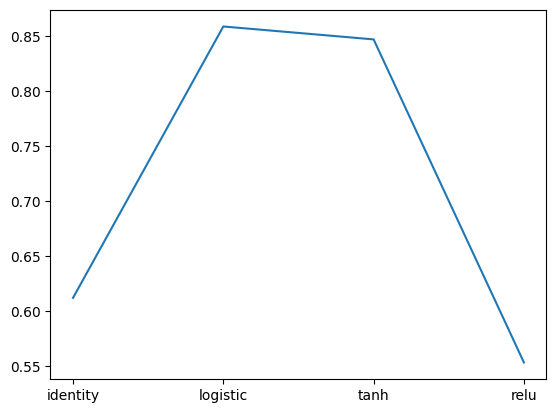

In [36]:
funcoes_ativacao = [ 'identity', 'logistic', 'tanh', 'relu']
resultados = {}
for funcao in funcoes_ativacao:
  mlp = MLPClassifier(activation=funcao,solver='adam',hidden_layer_sizes=(30), random_state=1, learning_rate_init=0.001)

  mlp.fit(X_train,y_train)

  y_pred = mlp.predict(X_test)
  mlp.score(X_test, y_test)

  resultados[funcao] = accuracy_score(y_test,y_pred)

plt.plot(funcoes_ativacao,list(resultados.values()))

##Encontrando o melhor algoritmo de correção de pesos

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


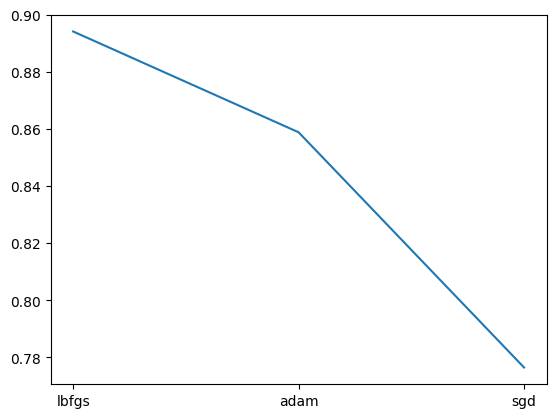

In [37]:
funcoes_correcao = [ 'lbfgs', 'adam', 'sgd']
resultados = {}
for funcao in funcoes_correcao:
  mlp = MLPClassifier(activation='logistic',solver=funcao,hidden_layer_sizes=(30), random_state=1, learning_rate_init=0.001)

  mlp.fit(X_train,y_train)

  y_pred = mlp.predict(X_test)
  mlp.score(X_test, y_test)

  resultados[funcao] = accuracy_score(y_test,y_pred)

plt.plot(funcoes_correcao,list(resultados.values()))

##Encontrando uma quantidade de camadas adequadas

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

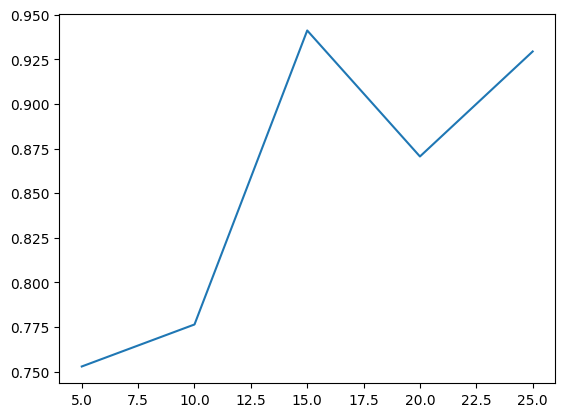

In [38]:
resultados = {}
camadas = range(5, 30, 5)
for qtd_camadas in camadas:
  mlp = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(qtd_camadas), random_state=1, learning_rate_init=0.001)

  mlp.fit(X_train,y_train)

  y_pred = mlp.predict(X_test)
  mlp.score(X_test, y_test)

  resultados[qtd_camadas] = accuracy_score(y_test,y_pred)

plt.plot(camadas,list(resultados.values()))

##Melhor combinação foi encontrada

In [39]:
mlp = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(15), random_state=1, learning_rate_init=0.001)

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
mlp.score(X_test, y_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.94      0.98      0.96        64

    accuracy                           0.94        85
   macro avg       0.94      0.90      0.92        85
weighted avg       0.94      0.94      0.94        85



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
